<a href="https://colab.research.google.com/github/jay-madane/ML_clg_labs/blob/main/ml_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 7
##Implementation and Comparison Analysis of Clustering Techniques

####Name: Jay Kiran Madane
####PRN: RBT21CB036
####Title: Identifying the Best Clustering Technique.
####Aim: To perform different Clustering algorithms on a given dataset and compare them.
####Dataset: California Housing  
####Theory:
Clustering is a technique in machine learning and data analysis where similar data points are grouped together into clusters based on their features or characteristics. The goal is to uncover patterns, structures, or relationships within the data and organize it into meaningful groups. Clustering is an unsupervised learning method, meaning that it doesn't rely on predefined labels for the data.

There are various types of clustering algorithms, and you've mentioned three popular ones: K-means, Hierarchical, and DBSCAN

#### Code:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

In [ ]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.data
target = california_housing.target

In [ ]:
subset_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']

In [ ]:
# Extract the subset of features from the original data
data_subset = data[subset_features]

In [ ]:
# Standardize the subset of features
scaler_subset = StandardScaler()
data_standardized_subset = scaler_subset.fit_transform(data_subset)

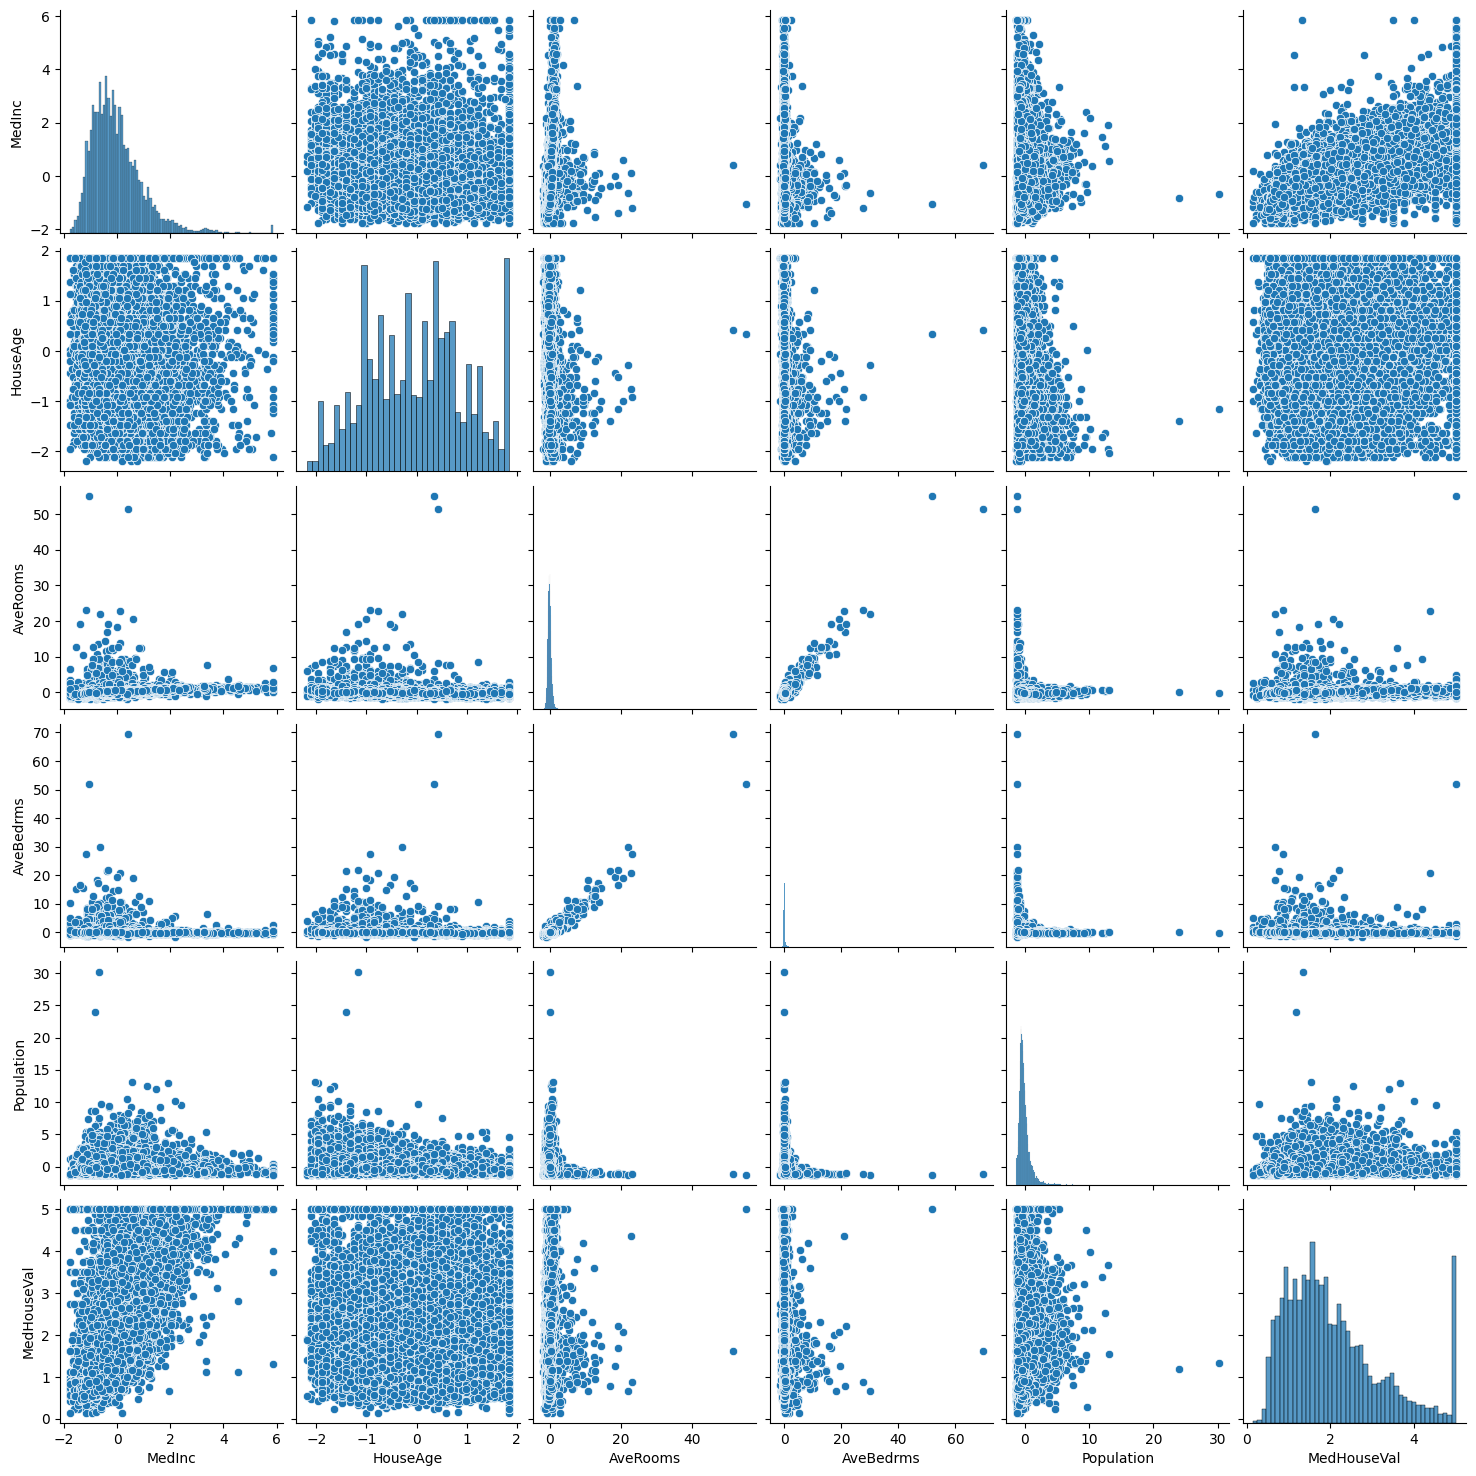

In [ ]:
# Visualize the data using a pairplot
sns.pairplot(pd.concat([pd.DataFrame(data_standardized_subset, columns=data_subset.columns), target], axis=1))
plt.show()

In [ ]:
# Apply clustering algorithms to the subset of features
def apply_clustering_algorithm(algorithm, data, **kwargs):
    model = algorithm(**kwargs)
    labels = model.fit_predict(data)
    return labels

# KMeans
kmeans_labels_subset = apply_clustering_algorithm(KMeans, data_standardized_subset, n_clusters=2)

# Hierarchical clustering
hierarchical_labels_subset = apply_clustering_algorithm(AgglomerativeClustering, data_standardized_subset, n_clusters=2)

# DBSCAN
dbscan_labels_subset = apply_clustering_algorithm(DBSCAN, data_standardized_subset, eps=1.5, min_samples=5)

# Expectation Maximization (Gaussian Mixture Model)
em_labels_subset = apply_clustering_algorithm(GaussianMixture, data_standardized_subset, n_components=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate the clustering results on the subset of features
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(data, labels)
        return score
    else:
        return "Not enough clusters"

In [ ]:
kmeans_score_subset = evaluate_clustering(kmeans_labels_subset, data_standardized_subset)
hierarchical_score_subset = evaluate_clustering(hierarchical_labels_subset, data_standardized_subset)
dbscan_score_subset = evaluate_clustering(dbscan_labels_subset, data_standardized_subset)
em_score_subset = evaluate_clustering(em_labels_subset, data_standardized_subset)


In [ ]:
# Display the results for the subset of features
print(f"KMeans Silhouette Score (Subset): {kmeans_score_subset}")
print(f"Hierarchical Silhouette Score (Subset): {hierarchical_score_subset}")
print(f"DBSCAN Silhouette Score (Subset): {dbscan_score_subset}")
print(f"Expectation Maximization Silhouette Score (Subset): {em_score_subset}")

KMeans Silhouette Score (Subset): 0.857335760296384
Hierarchical Silhouette Score (Subset): 0.8022716887459003
DBSCAN Silhouette Score (Subset): 0.8021095721002368
Expectation Maximization Silhouette Score (Subset): 0.48352034406979605


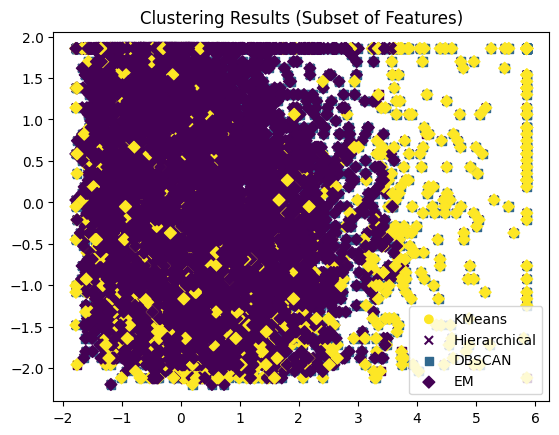

In [ ]:
# Visualize the clustering results on the subset of features
plt.scatter(data_standardized_subset[:, 0], data_standardized_subset[:, 1], c=kmeans_labels_subset, cmap='viridis', marker='o', label='KMeans')
plt.scatter(data_standardized_subset[:, 0], data_standardized_subset[:, 1], c=hierarchical_labels_subset, cmap='viridis', marker='x', label='Hierarchical')
plt.scatter(data_standardized_subset[:, 0], data_standardized_subset[:, 1], c=dbscan_labels_subset, cmap='viridis', marker='s', label='DBSCAN')
plt.scatter(data_standardized_subset[:, 0], data_standardized_subset[:, 1], c=em_labels_subset, cmap='viridis', marker='D', label='EM')
plt.legend()
plt.title('Clustering Results (Subset of Features)')
plt.show()